In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [18]:
df = pd.DataFrame(pd.read_pickle('x_scaled.pickle'))

In [19]:
print(df.shape)
df.head()

(3100, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.833333,0.019103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.666667,0.126231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.666667,0.178560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.500000,0.344442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.008637,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

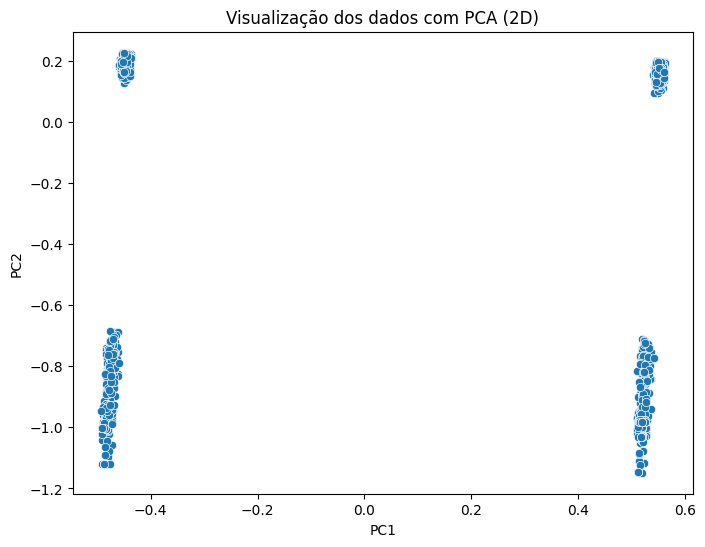

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Visualização dos dados com PCA (2D)')
plt.show()

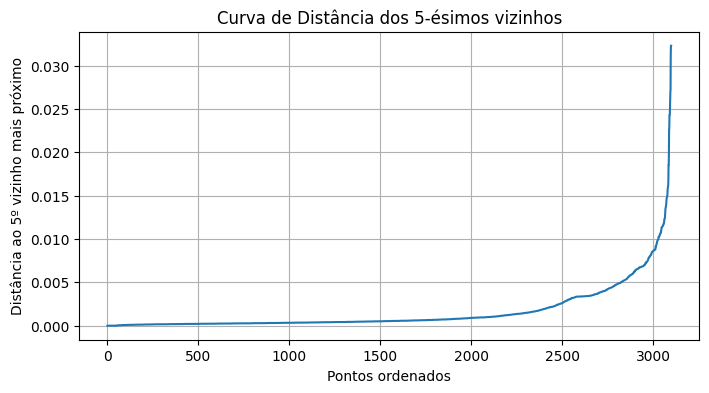

In [22]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('Curva de Distância dos 5-ésimos vizinhos')
plt.xlabel('Pontos ordenados')
plt.ylabel('Distância ao 5º vizinho mais próximo')
plt.grid(True)
plt.show()

In [23]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca)

df_pca['cluster'] = dbscan_labels

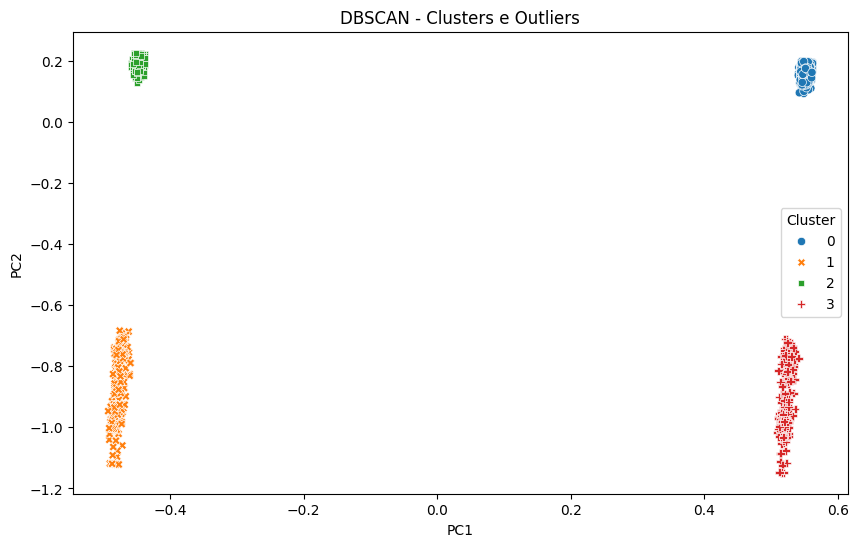

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='tab10', style='cluster')
plt.title('DBSCAN - Clusters e Outliers')
plt.legend(title='Cluster')
plt.show()

In [25]:
df_pca['cluster'].value_counts()

cluster
2    1400
0    1173
1     294
3     233
Name: count, dtype: int64